In [3]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## to import datetime library
from datetime import datetime
import datetime as dt

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
# libraries for save the model
import pickle

In [4]:
# Load the dataset
file_path = "C:/Users/Arbaz zia/Desktop/data set/energy_consumption_data.csv"
data = pd.read_csv(file_path)
print(data.head())
# Dataset Rows & Columns count
data.info()
data.shape
data.describe()

          Datetime  AEP_MW
0  12/31/2004 1:00   13478
1  12/31/2004 2:00   12865
2  12/31/2004 3:00   12577
3  12/31/2004 4:00   12517
4  12/31/2004 5:00   12670
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  121273 non-null  object
 1   AEP_MW    121273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [5]:
# Get count duplicates for each unique row
dup_Count =  len(data)-len(data.drop_duplicates()) 
dup_count1 = data[data.duplicated()].shape
dup_count1

(0, 2)

In [6]:
# Missing Values/Null Values Count
Null_values = data.isnull().sum()
Null_values

Datetime    0
AEP_MW      0
dtype: int64

<Figure size 1000x1000 with 0 Axes>

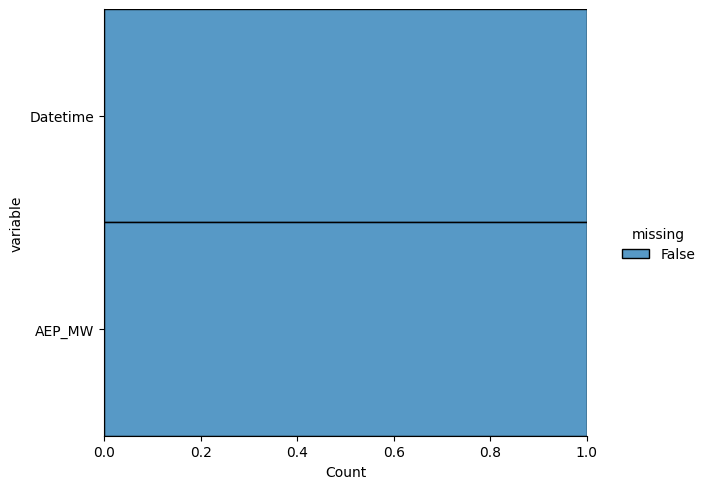

In [7]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [8]:
# Dataset Columns
data.columns

Index(['Datetime', 'AEP_MW'], dtype='object')

In [9]:
# Check Unique Values for each variable.
def get_unqiuevalues(df1):
    unique_values=df1.apply(pd.Series.unique)
    return unique_values

unq_values = get_unqiuevalues(data)

# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique())

No. of unique values in  Datetime is 121269
No. of unique values in  AEP_MW is 12643


In [10]:
# Data wrangling
df_energy = data.copy()
df_energy.head()

,Datetime,AEP_MW
0,12/31/2004 1:00,13478
1,12/31/2004 2:00,12865
2,12/31/2004 3:00,12577
3,12/31/2004 4:00,12517
4,12/31/2004 5:00,12670


In [11]:
#rename the columns
df_energy.rename(columns={'Datetime': 'Date & time', 'AEP_MW':'Energy_consumptiom'},inplace = True)

In [12]:
df_energy.columns
     

Index(['Date & time', 'Energy_consumptiom'], dtype='object')

In [13]:
df_energy.head()

,Date & time,Energy_consumptiom
0,12/31/2004 1:00,13478
1,12/31/2004 2:00,12865
2,12/31/2004 3:00,12577
3,12/31/2004 4:00,12517
4,12/31/2004 5:00,12670


In [14]:
df_energy.describe()

,Energy_consumptiom
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [15]:
import pandas as pd

# Assuming your dataframe has a 'timestamp' column
# To generate a sample dataframe for demonstration:


# Convert the 'timestamp' column to datetime
df_energy['Date & time']=pd.to_datetime(df_energy['Date & time'])

#Getting the months and days from date

df_energy['month'] = df_energy['Date & time'].dt.month
df_energy['weekday'] = df_energy['Date & time'].dt.weekday
df_energy['hour'] = df_energy['Date & time'].dt.hour

#drop the date column
df_energy.drop('Date & time',axis=1,inplace=True)
df_energy.head()

,Energy_consumptiom,month,weekday,hour
0,13478,12,4,1
1,12865,12,4,2
2,12577,12,4,3
3,12517,12,4,4
4,12670,12,4,5


In [16]:
#separate column list for better analysis
date_col = ['month','weekday','hour']
consumptiom_col = ["Energy_consumptiom"]

<Axes: xlabel='Energy_consumptiom', ylabel='Density'>

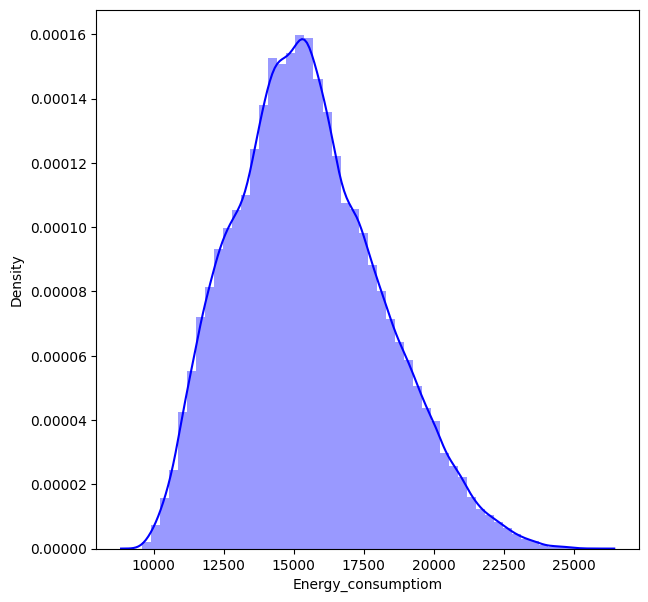

In [17]:
# Chart - 1 visualization code
#Dependent varaible "Appliance"
plt.figure(figsize=(7,7))
sns.distplot(df_energy['Energy_consumptiom'], color = 'Blue')

<Axes: xlabel='Energy_consumptiom', ylabel='Density'>

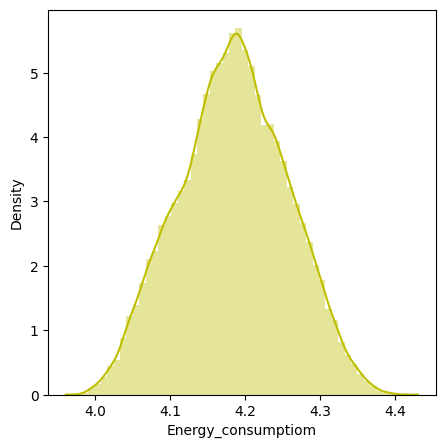

In [18]:
# Chart - 2 
# Dependent variable 'Price'
plt.figure(figsize=(5,5))
sns.distplot(np.log10(df_energy['Energy_consumptiom']),color="y")

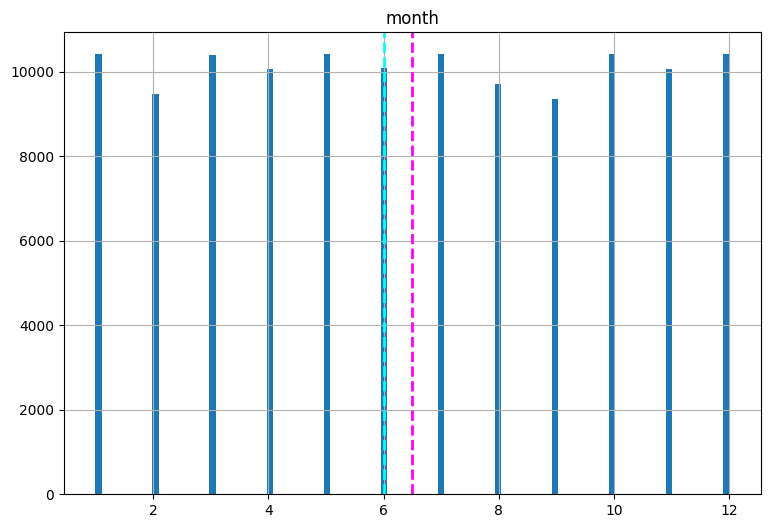

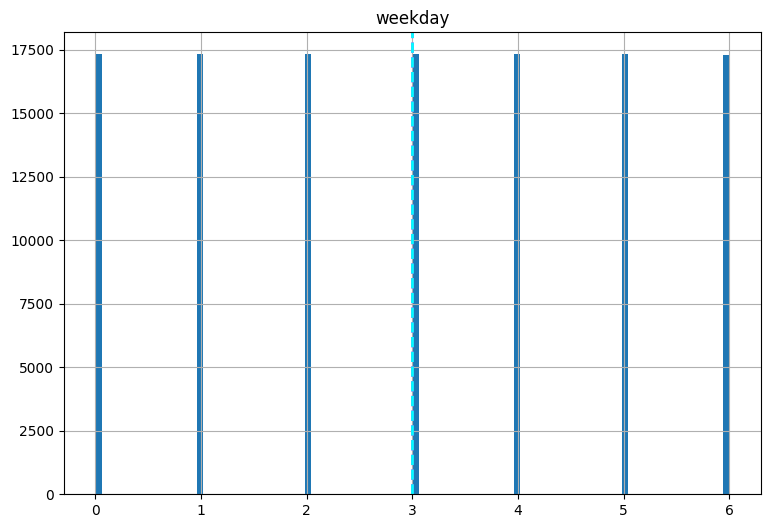

In [19]:
# Chart - 3 
# plot a bar plot for each numerical feature count 

for col in date_col[:-1]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = (df_energy[col])
    feature.hist(bins=100, ax = ax)
    ax.axvline(df_energy[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

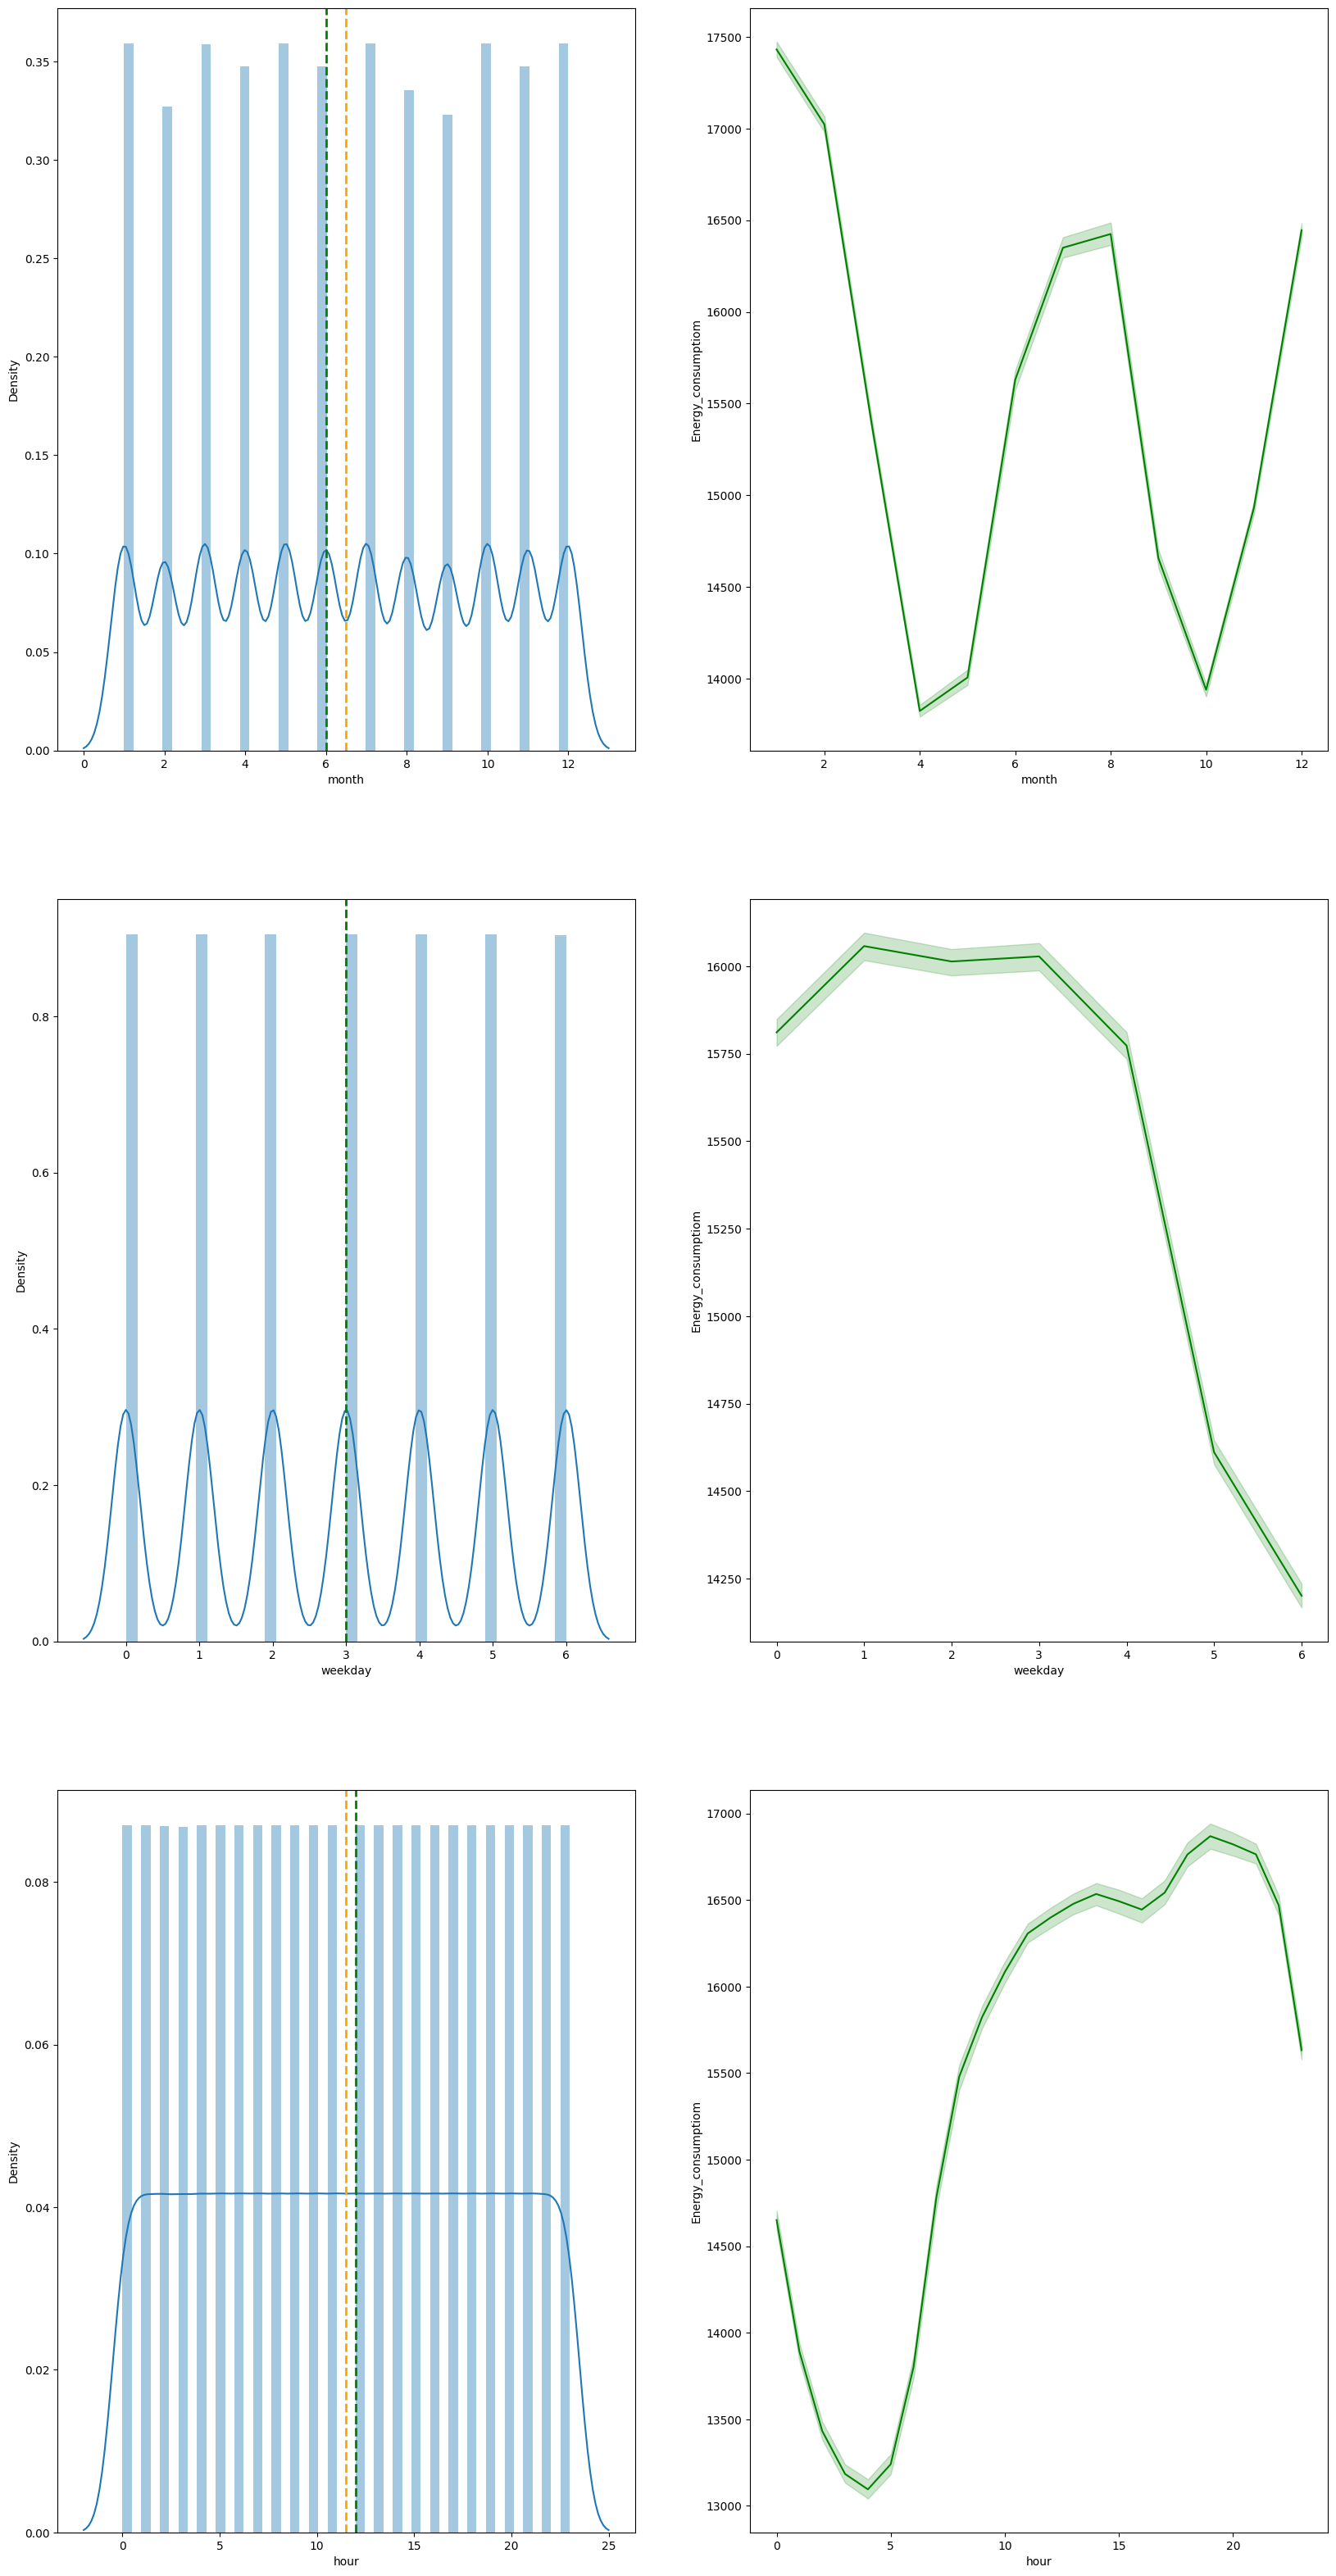

In [20]:
n=len(date_col)
fig,ax=plt.subplots(len(date_col),2,figsize=(20,40))
for i,col in enumerate(date_col):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.lineplot(data=df_energy,x=col,y='Energy_consumptiom',color='green',ax=ax[i,1]);

In [21]:
for col  in date_col:
  skewness = df_energy[col].skew(axis=0, skipna = True)
  print("The skweness of " ,col ,"is",skewness  )

The skweness of  month is 0.007870377703003372
The skweness of  weekday is 0.00018029231007074878
The skweness of  hour is -0.0002983686811141537


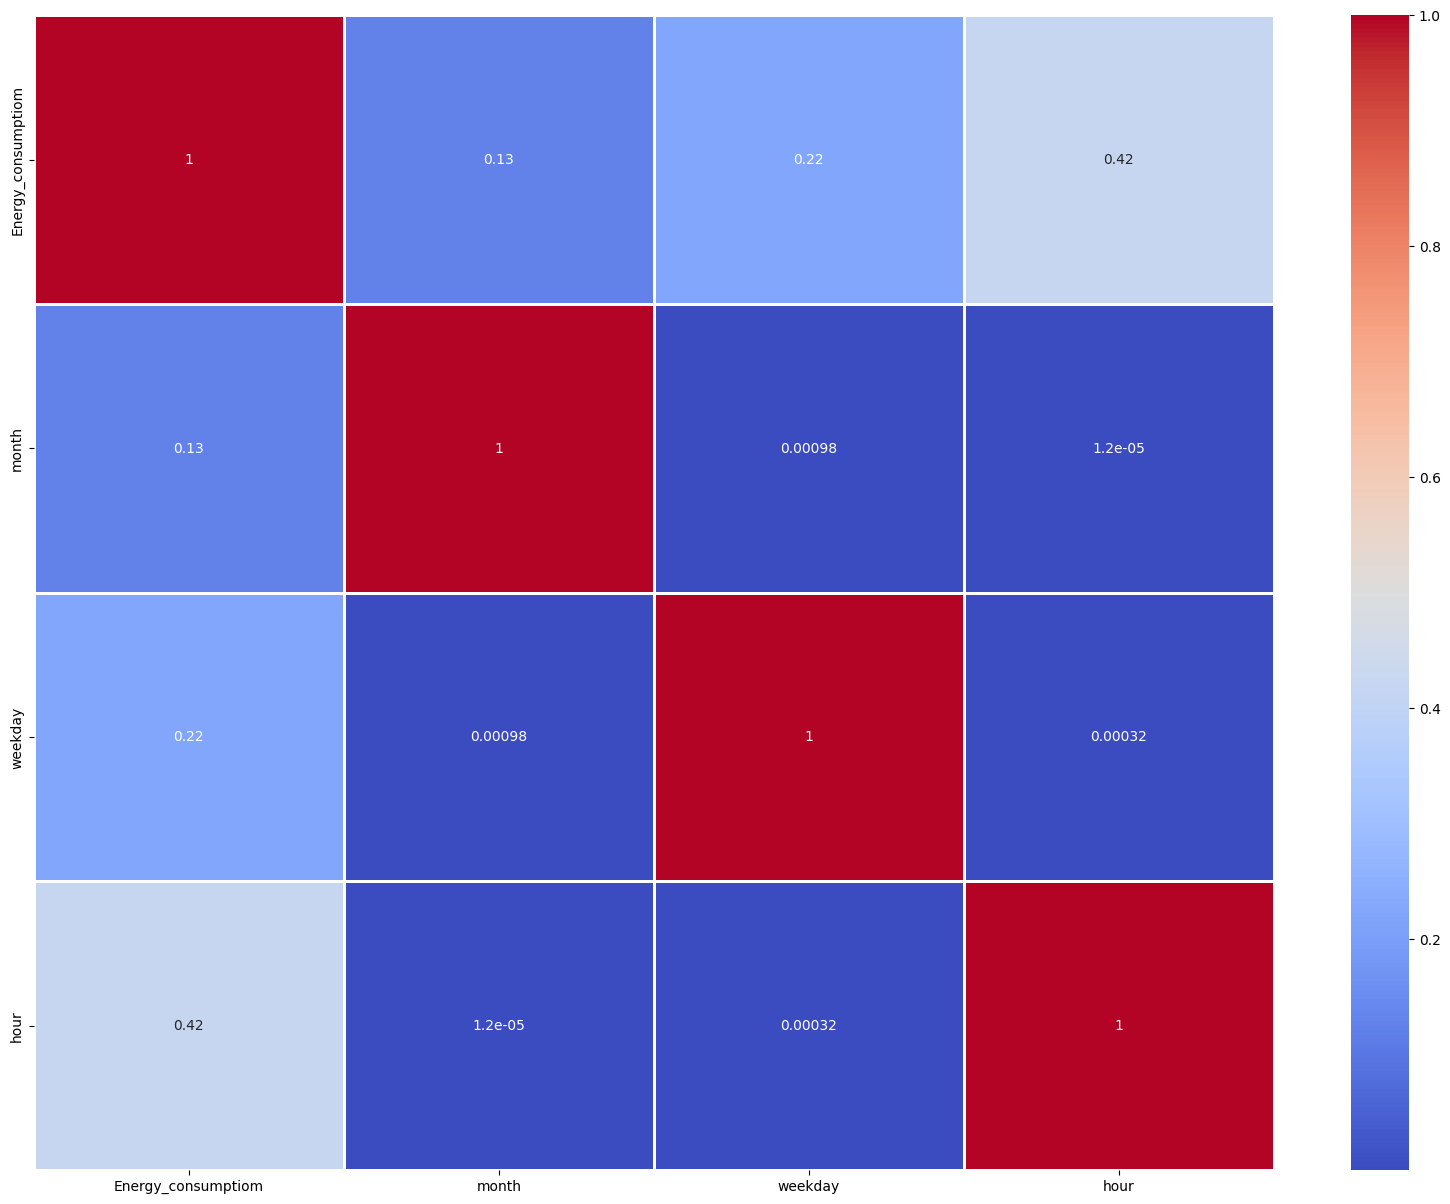

In [22]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
correlation = df_energy.corr()
sns.heatmap(abs(correlation) ,annot =True , cmap = 'coolwarm', linewidth = 1)
plt.show()

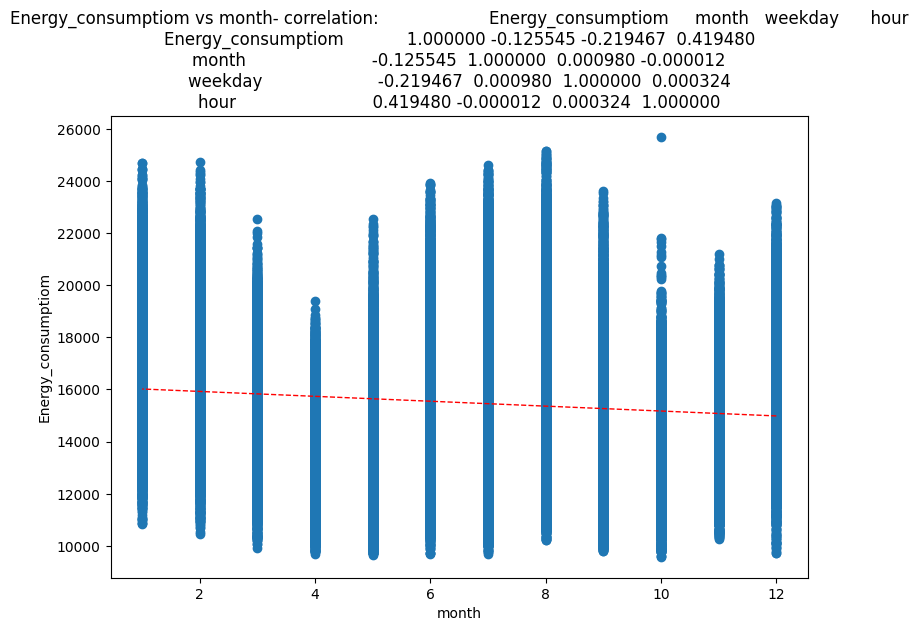

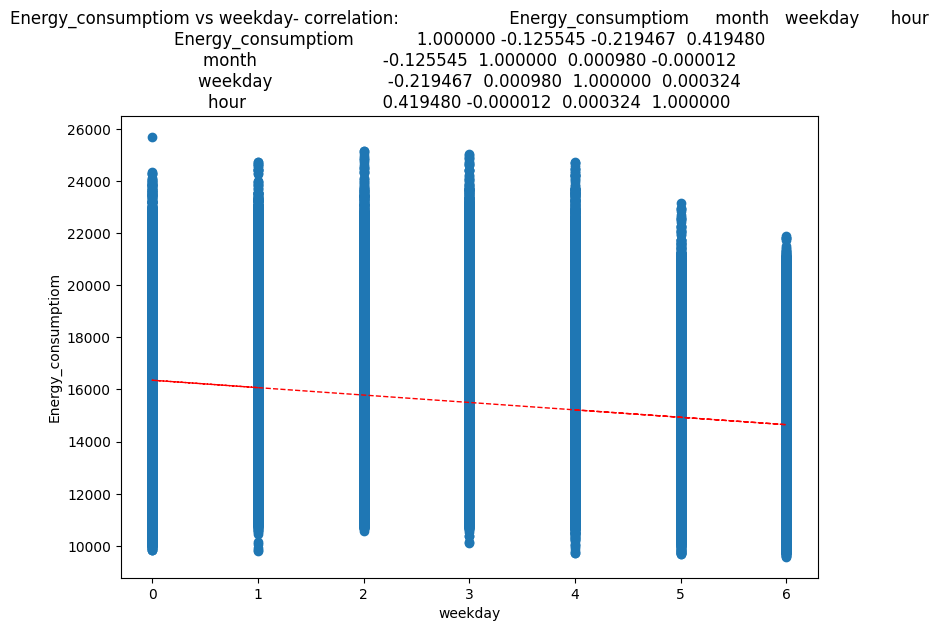

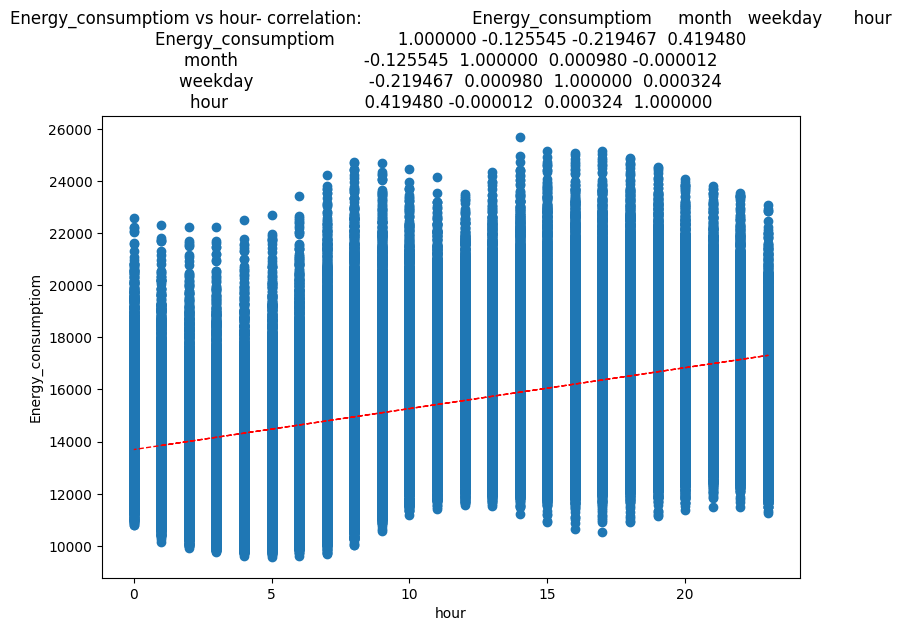

In [23]:
for col in date_col[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df_energy[col]
  label = df_energy['Energy_consumptiom']
  correaltion = feature.corr(label)
  plt.scatter(x=feature,y =label)
  plt.xlabel(col)
  plt.ylabel('Energy_consumptiom')
  ax.set_title('Energy_consumptiom vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df_energy[col], df_energy['Energy_consumptiom'], 1)
  y_hat = np.poly1d(z)(df_energy[col])

  plt.plot(df_energy[col], y_hat, "r--", lw=1)

plt.show()

<Axes: xlabel='hour', ylabel='Energy_consumptiom'>

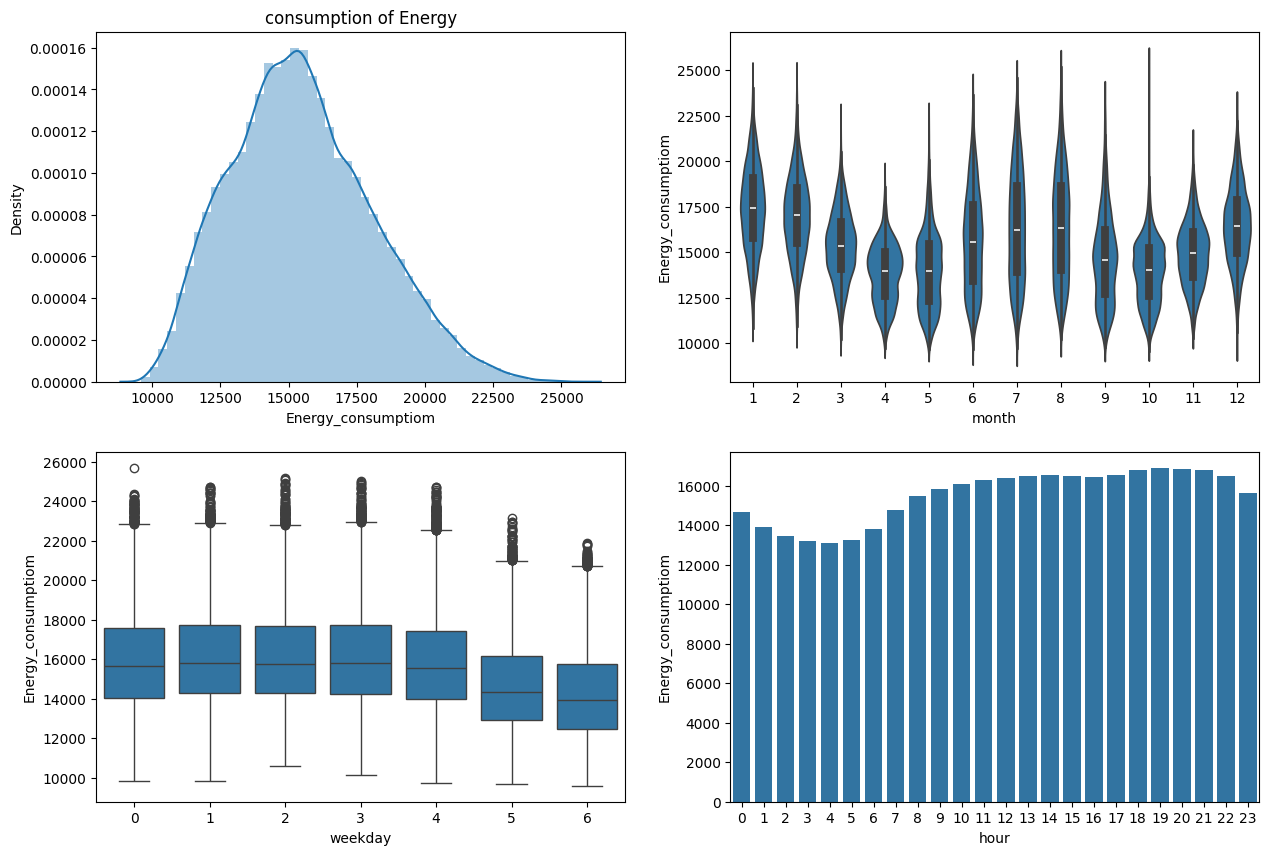

In [24]:
#  Energy_consumptiom  Column

fig,ax=plt.subplots(2,2,figsize=(15,10))

#Distribution of Appliances
dist=sns.distplot(df_energy['Energy_consumptiom'],ax=ax[0,0])
dist.set_title('consumption of Energy')

#Average Energy_consumptiom over month
month_eng=pd.DataFrame(df_energy.groupby('month')['Energy_consumptiom'].mean()).reset_index()
sns.violinplot(x=df_energy['month'],y=df_energy['Energy_consumptiom'], ax=ax[0,1])

#Average Energy_consumptiom over weekdays
weekday_eng=pd.DataFrame(df_energy.groupby('weekday')['Energy_consumptiom'].mean()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Energy_consumptiom'],ax=ax[1,0])
sns.boxplot(x=df_energy['weekday'],y=df_energy['Energy_consumptiom'],ax=ax[1,0])
#Average Energy_consumptiom over hours
hour_eng=pd.DataFrame(df_energy.groupby('hour')['Energy_consumptiom'].mean()).reset_index()
sns.barplot(x=hour_eng['hour'],y=hour_eng['Energy_consumptiom'],ax=ax[1,1])

<Figure size 2500x2500 with 0 Axes>

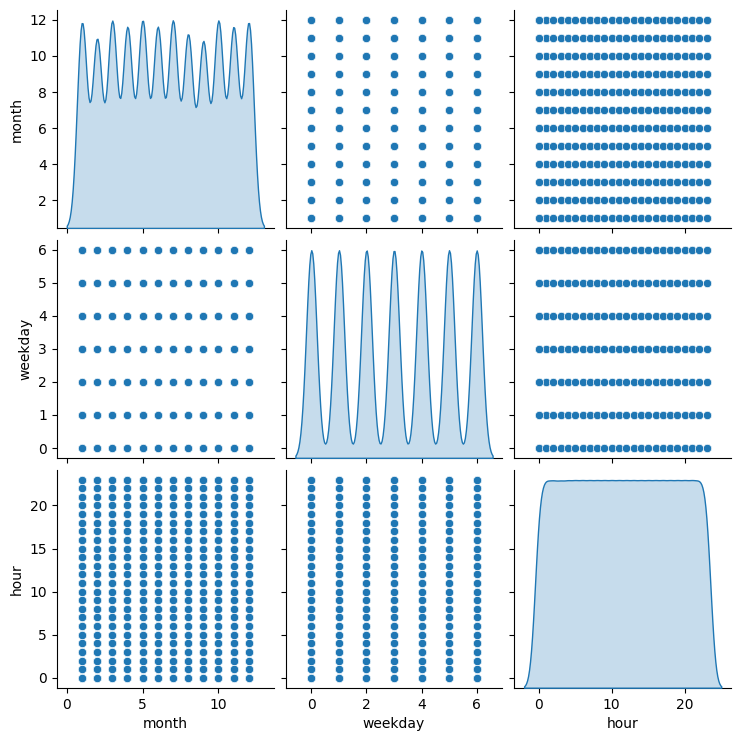

In [25]:
# Pair Plot visualization code
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[date_col], diag_kind='kde')
plt.show()

In [26]:
# Handling Missing Values & Missing Value Imputation
Missing_Values = df_energy.isnull().sum()
Missing_Values

Energy_consumptiom    0
month                 0
weekday               0
hour                  0
dtype: int64

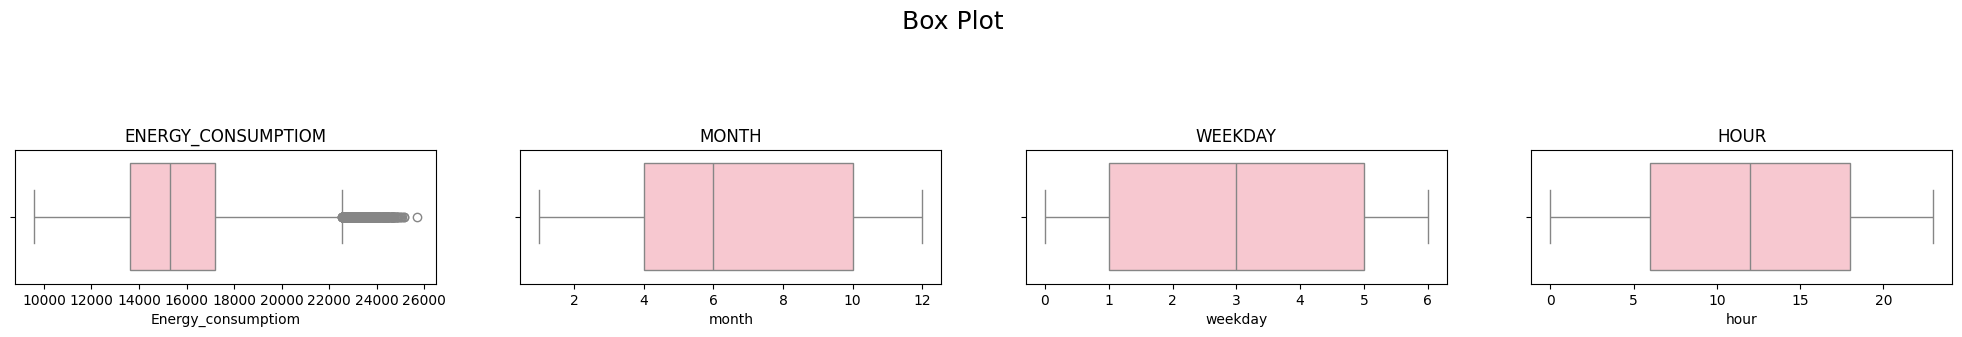

In [27]:
# Handling Outliers & Outlier treatments
df= df_energy.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [28]:
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(df_energy)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
Energy_consumptiom    667
month                   0
weekday                 0
hour                    0
dtype: int64


In [29]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Energy_consumptiom 

Percentiles: 25th=13630.000, 75th=17200.000, IQR=3570.000

lower = 8275.0 and upper = 22555.0 
 
Identified outliers: 667
Energy_consumptiom Outliers Removed

-------

month 

Percentiles: 25th=4.000, 75th=10.000, IQR=6.000

lower = -5.0 and upper = 19.0 
 
Identified outliers: 0

-------

weekday 

Percentiles: 25th=1.000, 75th=5.000, IQR=4.000

lower = -5.0 and upper = 11.0 
 
Identified outliers: 0

-------

hour 

Percentiles: 25th=6.000, 75th=18.000, IQR=12.000

lower = -12.0 and upper = 36.0 
 
Identified outliers: 0

-------



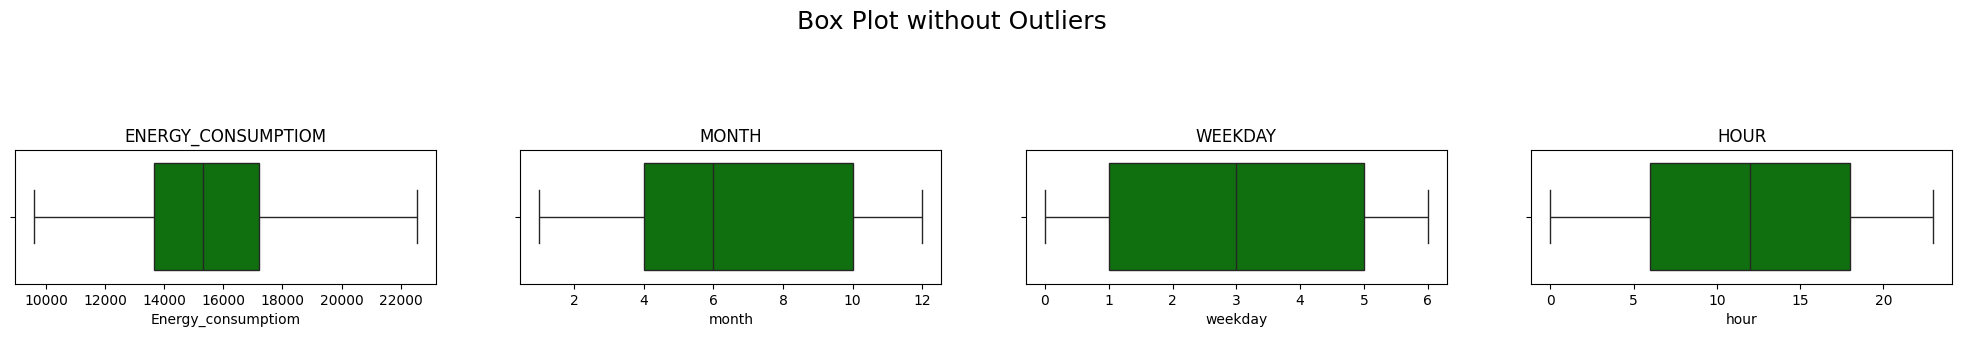

In [30]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [31]:
//df['Average_energy_consumption']=df[['Energy_consumptiom']].mean(axis=1)

SyntaxError: invalid syntax (3765679855.py, line 1)

In [32]:
#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif['varabiles']= X.columns
  vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
  return (vif)

In [33]:

calc_vif(df[[i for i in df.describe().columns if i not in ['Energy_consumptiom']]]).sort_values(by='VIF',ascending=False)

,varabiles,VIF
0,month,2.85
2,hour,2.67
1,weekday,2.49


In [39]:
from scipy.stats import zscore
# Scaling your data
Features  = ['month',	'hour',	'weekday']
X = df_removed[Features]
#X.shape

In [40]:
y = df_removed['Energy_consumptiom']
#y =np.log10(df_removed['Energy consumption'])

In [41]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(97018, 3)
(24255, 3)


In [ ]:
# Scaling your data
# Scaling your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [52]:
# Visualizing evaluation Metric Score chart
# ML Model - 4 Implementation
# define the decision tree model
model = ExtraTreesRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_br = mean_squared_error(y_test, y_pred)
r2_br = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_br)
print("R-squared: ", r2_br)
     

Mean squared error:  2307192.3085619058
R-squared:  0.6495492453626734


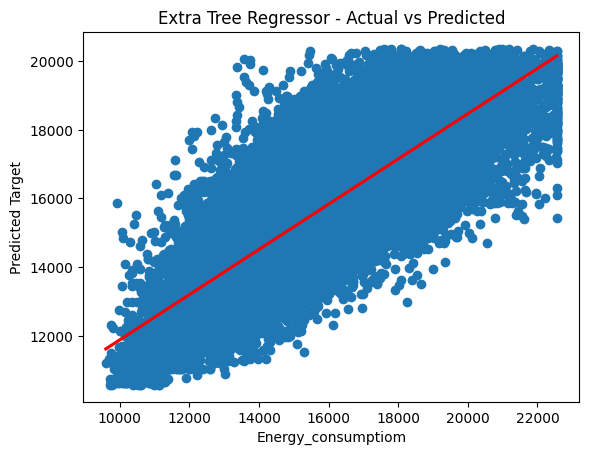

In [53]:
# Visualizing evaluation Metric Score chart
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Extra Tree Regressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()
     

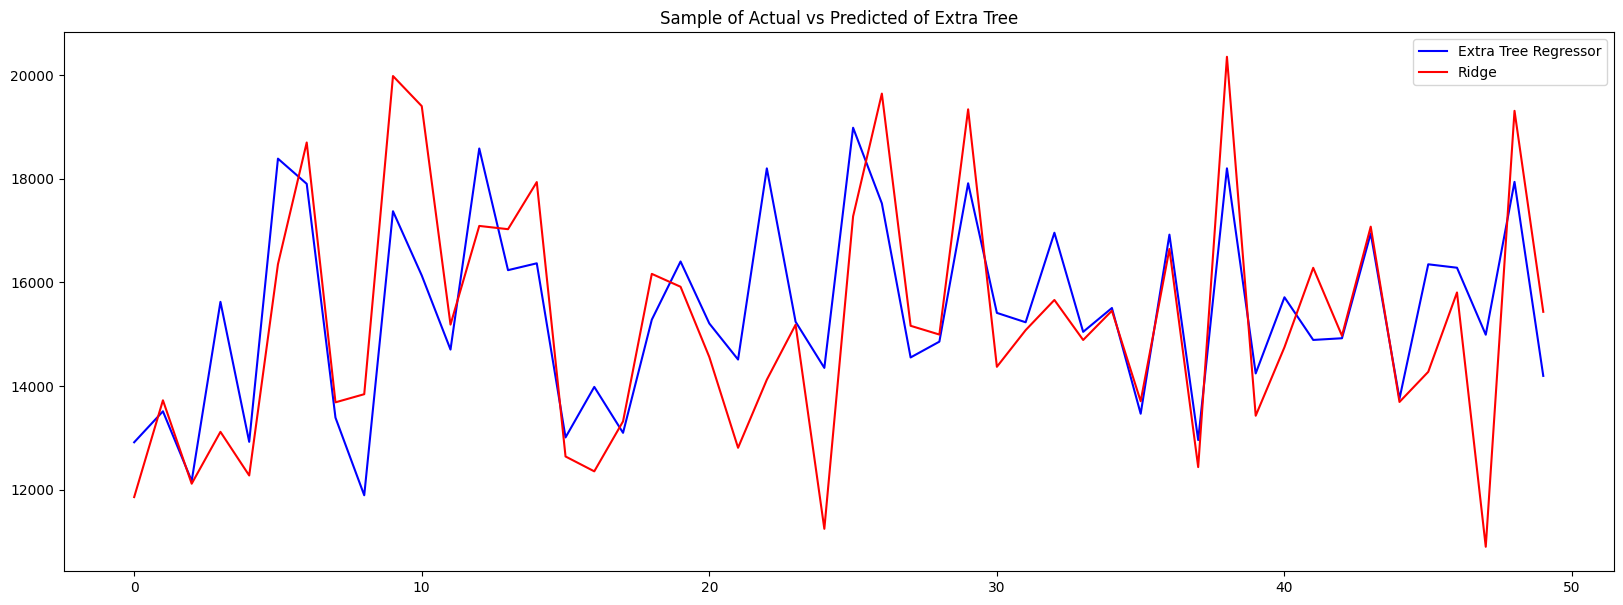

In [57]:
# Visualizing evaluation Metric Score chart
## Plot the predicted vs actual values
plt.figure(figsize=(20,7))
plt.plot(((y_pred)[500:550]),color='blue')
plt.plot((np.array((y_test)[500:550])),color='red')
plt.legend(["Extra Tree Regressor","Ridge","Lasso","Actual"])
plt.title("Sample of Actual vs Predicted of Extra Tree" )
plt.show()


In [ ]:
#ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= { 'bootstrap': [True, False],
                          'max_depth': [70,100, None],
                          'criterion' :['squared_error'],
                          'max_features': ['log2', 'sqrt'],
                          'n_estimators': [10,1400,100]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)
dt_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    random_state=0)

br_best = grid_search.best_estimator_

# Fit the Algorithm
br_best.fit(X_train_scaled, y_train)

#predict on the training model
br_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = br_best.predict(X_test_scaled)
#evaluate the model
mse_br_train=mean_squared_error(y_train,br_train)
mse_br_test = mean_squared_error(y_test, y_pred)
r2_br_train = r2_score(y_train, br_train)
r2_br_test = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_br_test)
print("R-squared: ", r2_br_test)

In [ ]:
# Visualizing evaluation Metric Score chart
## Plot the predicted vs actual values
plt.figure(figsize=(20,7))
plt.plot(((y_pred)[500:550]),color='blue')
plt.plot((np.array((y_test)[500:550])),color='red')
plt.legend(["Extra Tree Regressor","Ridge","Lasso","Actual"])
plt.title("Sample of Actual vs Predicted of Extra Tree" )
plt.show()
     